In [3]:
from data.data_loading import load_data
from titanic.infrastructure.cleaning import *
from titanic.infrastructure.catego_stat_des import *
from titanic.infrastructure.quanti_stat_des import *
from titanic.domain.feature_engineering import *
from titanic.domain.model import *



In [4]:
df=load_data()

In [5]:
df=goodColumnsFormat(df)

In [6]:
df=renameColumns(df)

In [7]:
df=replacingNA(df)

In [8]:
df=removeDuplicates(df)

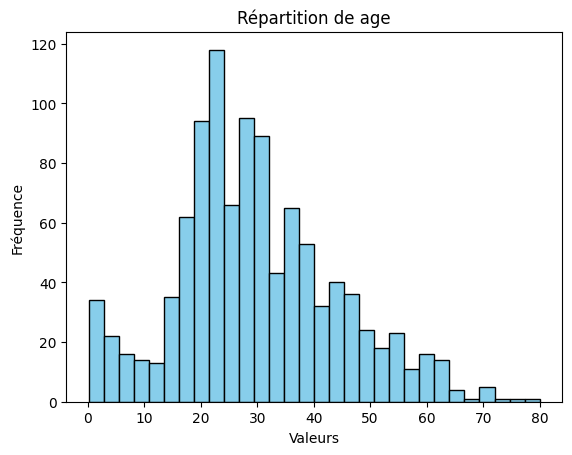

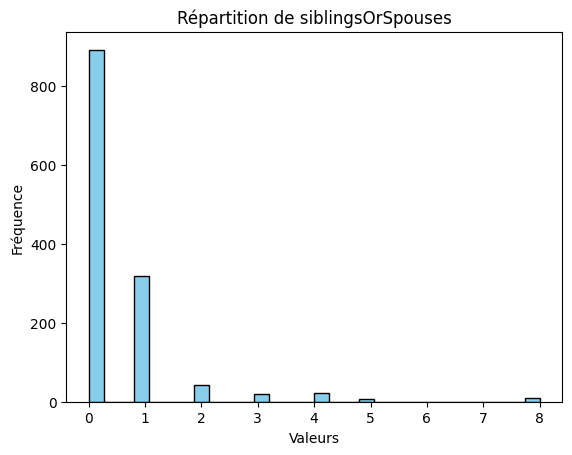

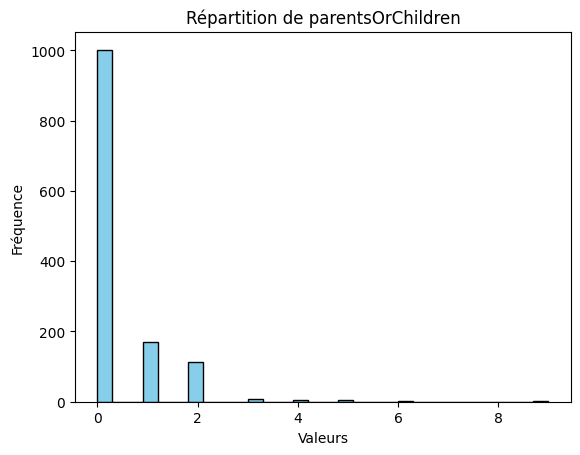

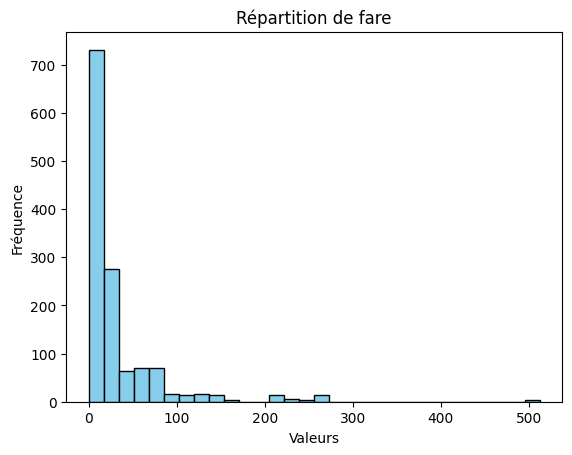

In [9]:
plot_histogram(df)

In [10]:
df.columns

Index(['passengerClass', 'survived', 'name', 'sex', 'age', 'siblingsOrSpouses',
       'parentsOrChildren', 'ticket', 'fare', 'cabin', 'embarked', 'boat',
       'body', 'homeDestination'],
      dtype='object')

In [11]:
df=transfomm_homedest(df)

In [12]:
df_encoded=encode_features(df)

In [13]:
selected_columns=['passengerClass','sex','fare','age','survived']

In [14]:
df_model=feature_selection(df_encoded,selected_columns)

In [15]:
y=df_model['survived']
x=df_model.drop(columns='survived',axis=1)

In [16]:

x=getDummies(x,cols=['passengerClass','sex','fare','age'])


Training Score: 0.7910295616717635

Testing Score: 0.7835365853658537

Accuracy: 0.7835365853658537

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       184
           1       0.81      0.67      0.73       144

    accuracy                           0.78       328
   macro avg       0.79      0.77      0.77       328
weighted avg       0.79      0.78      0.78       328



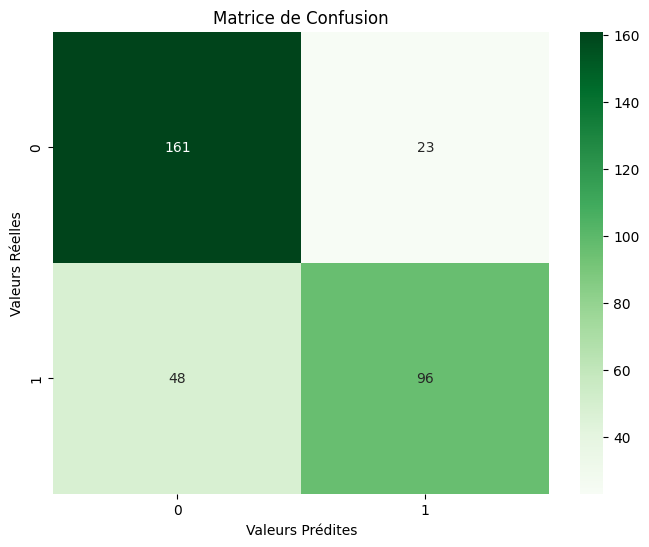

Scores de validation croisée: [0.75954198 0.79389313 0.78244275 0.81679389 0.72030651]
Score moyen: 0.7745956538270306


In [17]:
reg=apply_LogisticRegression(x,y)

In [18]:
reg.intercept_

array([2.49717619])

In [19]:
reg.coef_

array([[-0.74076437, -1.70362366, -2.37407211, -0.30042588,  0.27782795,
        -0.05857811, -0.64246723, -0.69088574, -0.70020279, -1.13682526,
        -0.69618706]])

In [30]:
tab=pd.DataFrame(data={'features':list(x.columns),
                       'coeff':reg.coef_.flatten()})

In [21]:
print("Longueur de x.columns:", len(x.columns))
print("Longueur de reg.coef_:", len(reg.coef_))

Longueur de x.columns: 11
Longueur de reg.coef_: 1
